#FINRL Train Stock Trading
https://github.com/AI4Finance-LLC/FinRL/blob/master/finrl/train.py

In this work SAC used as RL agorithm rather than D Q-Network. The reason of this choice explained in "Train Model" section.

Multi-stock trading data used in train and trade data part. So this work related to multi-stock trading with RL. DOW The latest market data for all 30 stocks in the Dow Jones Industrial Average. So in this work there is "BIST_30_TICKER" relates with that.



#SETUP

In [1]:
 # Install the unstable development version in Jupyter notebook:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-zm7goq_4
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-zm7goq_4
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-f3ikbrlz/pyfolio_2bb872892021433d88af6e4b83ea6d49
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-f3ikbrlz/pyfolio_2bb872892021433d88af6e4b83ea6d49
     |████████████████████████████████| 172 kB 7.0 MB/s 
     |████████████████████████████████| 49.6 MB 6.1 kB/s 
     |████████████████████████████████| 1.8 MB 35.3 MB/s 
     |████████████████████████████████| 124 kB 53.7 MB/s 
     |████████████████████████████████| 108 kB 16.2 MB/s 
     |████████████████████████████████| 40 kB 4.8 MB/s 
     |████████████████████████████████| 2.0 MB 36.7 MB/s 
     |████████████████████████████████| 153 kB 47.4 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |███████████

In [2]:
#for data download part -- yahoo finance
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

matplotlib.use("Agg")
import datetime

from finrl.apps import config
from finrl.neo_finrl.preprocessor.yahoodownloader import YahooDownloader
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.neo_finrl.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

import itertools


/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [4]:
import pandas as pd
import yfinance as yf

#Collect Data

In [5]:
stockList = ["AKBNK.IS","ARCLK.IS","ASELS.IS","BIMAS.IS","DOHOL.IS","EKGYO.IS","EREGL.IS","FROTO.IS","GARAN.IS","GUBRF.IS","HALKB.IS","ISCTR.IS","KCHOL.IS","KOZAA.IS","KOZAL.IS",
"KRDMD.IS","PETKM.IS","PGSUS.IS","SAHOL.IS","SASA.IS","SISE.IS","TAVHL.IS","TCELL.IS","THYAO.IS","TKFEN.IS","TTKOM.IS","TUPRS.IS","VAKBN.IS","VESTL.IS","YKBNK.IS"]
len(stockList)

30

In [6]:
# print("==============Start Fetching Data===========")
# df = YahooDownloader(
#     start_date=config.START_DATE,
#     end_date=config.END_DATE,
#     ticker_list=stockList,
# ).fetch_data()

In [7]:
x_change = "USDTRY=X" #x_change data downloaded
cx_data = yf.download(tickers=x_change , start="2015-07-27", end="2021-07-28" )

[*********************100%***********************]  1 of 1 completed


In [8]:
tickers = ["VESTL.IS","VAKBN.IS","TUPRS.IS""THYAO.IS","HALKB.IS","SASA.IS","PETKM.IS","SAHOL.IS","PGSUS.IS","GARAN.IS","AKBNK.IS","ARCLK.IS","BIMAS.IS","EREGL.IS"] # 20 tane hisse


In [9]:
date1="2015-07-27"
date2="2021-07-28"
list_data = []
for ticker in tickers:
  data = yf.download(tickers=ticker , start=date1, end=date2, interval='1d' )
  data["tic"] = ticker
  data["date"] = data.index
  data = data.reset_index()
  list_data.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TUPRS.ISTHYAO.IS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
list_data

[           Date       Open       High  ...   Volume       tic       date
 0    2015-07-27   4.450000   4.450000  ...  1074220  VESTL.IS 2015-07-27
 1    2015-07-28   4.450000   4.470000  ...  1609540  VESTL.IS 2015-07-28
 2    2015-07-29   4.430000   4.460000  ...   981396  VESTL.IS 2015-07-29
 3    2015-07-30   4.480000   4.490000  ...   871776  VESTL.IS 2015-07-30
 4    2015-07-31   4.480000   4.650000  ...  6003500  VESTL.IS 2015-07-31
 ...         ...        ...        ...  ...      ...       ...        ...
 1526 2021-07-14  30.420000  31.440001  ...  2070274  VESTL.IS 2021-07-14
 1527 2021-07-16  31.420000  31.620001  ...  1660750  VESTL.IS 2021-07-16
 1528 2021-07-19  31.400000  32.160000  ...  1369061  VESTL.IS 2021-07-19
 1529 2021-07-26  32.200001  32.279999  ...  2489134  VESTL.IS 2021-07-26
 1530 2021-07-27  31.980000  32.099998  ...  1726049  VESTL.IS 2021-07-27
 
 [1531 rows x 9 columns],
            Date  Open  High   Low  ...  Adj Close    Volume       tic       date
 0

In [11]:
import pandas as pd
df = pd.concat(list_data)

del df['Date']

In [12]:

df.isna().sum()
multi_ticker_df = df.ffill().bfill()
print(multi_ticker_df)

           Open       High        Low  ...      Volume       tic       date
0      4.450000   4.450000   4.330000  ...   1074220.0  VESTL.IS 2015-07-27
1      4.450000   4.470000   4.370000  ...   1609540.0  VESTL.IS 2015-07-28
2      4.430000   4.460000   4.410000  ...    981396.0  VESTL.IS 2015-07-29
3      4.480000   4.490000   4.430000  ...    871776.0  VESTL.IS 2015-07-30
4      4.480000   4.650000   4.480000  ...   6003500.0  VESTL.IS 2015-07-31
...         ...        ...        ...  ...         ...       ...        ...
1526  17.990000  18.400000  17.990000  ...  19197906.0  EREGL.IS 2021-07-14
1527  18.250000  18.250000  17.910000  ...  17163796.0  EREGL.IS 2021-07-16
1528  18.000000  18.030001  17.850000  ...   5709839.0  EREGL.IS 2021-07-19
1529  18.040001  18.250000  18.000000  ...  23665915.0  EREGL.IS 2021-07-26
1530  18.070000  18.490000  17.969999  ...  25081610.0  EREGL.IS 2021-07-27

[18372 rows x 8 columns]


In [13]:
# print("==============Start Fetching Data===========")
# df_ = YahooDownloader(
#     start_date=config.START_DATE,
#     end_date=config.END_DATE,
#     ticker_list=config.DOW_30_TICKER,
# ).fetch_data()

In [14]:
type(multi_ticker_df)

pandas.core.frame.DataFrame

In [15]:
multi_ticker_df.columns= multi_ticker_df.columns.str.strip().str.lower()
multi_ticker_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'tic', 'date'], dtype='object')

In [16]:
def prefill(multi_ticker_df)  :
    df = multi_ticker_df.copy()
    df=df.sort_values(['date','tic'],ignore_index=True)
    df.index = df.date.factorize()[0]
    merged_closes = df.pivot_table(index = 'date',columns = 'tic', values = 'close')

    print(merged_closes.isna().sum())
    merged_closes = merged_closes.ffill().bfill()

    # print(merged_closes.isna().sum())
    # print(merged_closes)
    tics = merged_closes.columns
    df = df[df.tic.isin(tics)]
    df = df.reset_index()
    del df['index']
    return df
multiticker_df = prefill(multi_ticker_df)


tic
AKBNK.IS    0
ARCLK.IS    0
BIMAS.IS    0
EREGL.IS    0
GARAN.IS    0
HALKB.IS    0
PETKM.IS    0
PGSUS.IS    0
SAHOL.IS    0
SASA.IS     0
VAKBN.IS    0
VESTL.IS    0
dtype: int64


In [17]:
print(multiticker_df)

            open       high        low  ...      volume       tic       date
0       6.182181   6.182181   6.122160  ...  13466375.0  AKBNK.IS 2015-07-27
1      14.750000  14.950000  14.500000  ...   1976842.0  ARCLK.IS 2015-07-27
2      23.525000  23.799999  23.325001  ...    628882.0  BIMAS.IS 2015-07-27
3       3.990000   4.040000   3.960000  ...   6776403.0  EREGL.IS 2015-07-27
4       7.900000   7.910000   7.740000  ...  63095366.0  GARAN.IS 2015-07-27
...          ...        ...        ...  ...         ...       ...        ...
18367  67.699997  71.949997  67.199997  ...   3505926.0  PGSUS.IS 2021-07-27
18368   9.070000   9.300000   9.020000  ...  17634418.0  SAHOL.IS 2021-07-27
18369  29.680000  30.299999  29.340000  ...  15605997.0   SASA.IS 2021-07-27
18370   3.430000   3.440000   3.390000  ...  30871452.0  VAKBN.IS 2021-07-27
18371  31.980000  32.099998  31.740000  ...   1726049.0  VESTL.IS 2021-07-27

[18372 rows x 8 columns]


In [18]:
# x_change data preprocessed and only ad close column stay with date column
cx_data.columns= cx_data.columns.str.strip().str.lower()
del cx_data["open"]
del cx_data["high"]
del cx_data["low"]
del cx_data["volume"]
del cx_data["close"]
cx_data["x_change"] = cx_data["adj close"]
del cx_data["adj close"]

cx_data = cx_data.reset_index()
cx_data.columns= cx_data.columns.str.strip().str.lower()

cx_data

,date,x_change
0,2015-07-27,2.74419
1,2015-07-28,2.76818
2,2015-07-29,2.75730
3,2015-07-30,2.76576
4,2015-07-31,2.78766
...,...,...
1540,2021-07-22,8.55416
1541,2021-07-23,8.55650
1542,2021-07-26,8.54757
1543,2021-07-27,8.55450


#Feature Engineering

In [19]:
print("==============Start Feature Engineering===========")
tech_indicator_list=config.TECHNICAL_INDICATORS_LIST

fe = FeatureEngineer(
    use_technical_indicator=True,
    tech_indicator_list=tech_indicator_list,
    use_turbulence=True,
    user_defined_feature=False,
)

==============Start Feature Engineering===========


In [20]:
tech_indicator_list.pop()

'dx_30'

In [21]:
tech_indicator_list

['macd', 'rsi_30', 'cci_30']

In [22]:
processed = fe.preprocess_data(multiticker_df)


Successfully added technical indicators
Successfully added turbulence index


In [23]:
processed

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,turbulence
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375.0,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000
1,14.750000,14.950000,14.500000,14.600000,11.878804,1976842.0,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000
2,23.525000,23.799999,23.325001,23.600000,19.072001,628882.0,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000
3,3.990000,4.040000,3.960000,4.040000,1.965522,6776403.0,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000
4,7.900000,7.910000,7.740000,7.760000,6.942376,63095366.0,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18367,67.699997,71.949997,67.199997,71.400002,71.400002,3505926.0,PGSUS.IS,2021-07-27,-2.136392,44.699076,-115.962311,7.048507
18368,9.070000,9.300000,9.020000,9.290000,9.290000,17634418.0,SAHOL.IS,2021-07-27,0.000826,53.078843,5.758155,7.048507
18369,29.680000,30.299999,29.340000,29.540001,29.540001,15605997.0,SASA.IS,2021-07-27,-0.567082,47.213518,-26.532921,7.048507
18370,3.430000,3.440000,3.390000,3.420000,3.420000,30871452.0,VAKBN.IS,2021-07-27,-0.036190,42.210935,-143.798826,7.048507


In [24]:
processed_full = processed.sort_values(['date','tic'])
processed_full= processed_full.ffill().bfill()

In [25]:
processed_full

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,turbulence
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375.0,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000
1,14.750000,14.950000,14.500000,14.600000,11.878804,1976842.0,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000
2,23.525000,23.799999,23.325001,23.600000,19.072001,628882.0,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000
3,3.990000,4.040000,3.960000,4.040000,1.965522,6776403.0,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000
4,7.900000,7.910000,7.740000,7.760000,6.942376,63095366.0,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18367,67.699997,71.949997,67.199997,71.400002,71.400002,3505926.0,PGSUS.IS,2021-07-27,-2.136392,44.699076,-115.962311,7.048507
18368,9.070000,9.300000,9.020000,9.290000,9.290000,17634418.0,SAHOL.IS,2021-07-27,0.000826,53.078843,5.758155,7.048507
18369,29.680000,30.299999,29.340000,29.540001,29.540001,15605997.0,SASA.IS,2021-07-27,-0.567082,47.213518,-26.532921,7.048507
18370,3.430000,3.440000,3.390000,3.420000,3.420000,30871452.0,VAKBN.IS,2021-07-27,-0.036190,42.210935,-143.798826,7.048507


In [26]:
cx_data

,date,x_change
0,2015-07-27,2.74419
1,2015-07-28,2.76818
2,2015-07-29,2.75730
3,2015-07-30,2.76576
4,2015-07-31,2.78766
...,...,...
1540,2021-07-22,8.55416
1541,2021-07-23,8.55650
1542,2021-07-26,8.54757
1543,2021-07-27,8.55450


In [27]:
merged_df = pd.merge(processed_full, cx_data, on='date')

In [28]:
processed_full = merged_df
processed_full #final df

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,turbulence,x_change
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375.0,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
1,14.750000,14.950000,14.500000,14.600000,11.878804,1976842.0,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
2,23.525000,23.799999,23.325001,23.600000,19.072001,628882.0,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
3,3.990000,4.040000,3.960000,4.040000,1.965522,6776403.0,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
4,7.900000,7.910000,7.740000,7.760000,6.942376,63095366.0,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18091,67.699997,71.949997,67.199997,71.400002,71.400002,3505926.0,PGSUS.IS,2021-07-27,-2.136392,44.699076,-115.962311,7.048507,8.55450
18092,9.070000,9.300000,9.020000,9.290000,9.290000,17634418.0,SAHOL.IS,2021-07-27,0.000826,53.078843,5.758155,7.048507,8.55450
18093,29.680000,30.299999,29.340000,29.540001,29.540001,15605997.0,SASA.IS,2021-07-27,-0.567082,47.213518,-26.532921,7.048507,8.55450
18094,3.430000,3.440000,3.390000,3.420000,3.420000,30871452.0,VAKBN.IS,2021-07-27,-0.036190,42.210935,-143.798826,7.048507,8.55450


# Training & Trading data split

In [29]:
date1="2015-07-27"
date2="2021-07-28"
date3= "2020-07-27"

In [30]:
train = data_split(processed_full,date1, date3)
trade = data_split(processed_full, date3, date2)


# Calculate state action space


In [31]:
config.TECHNICAL_INDICATORS_LIST.append("x_change") # x_change column added to indicator list . So ENV can see the new column.
config.TECHNICAL_INDICATORS_LIST

['macd', 'rsi_30', 'cci_30', 'x_change']

In [32]:
stock_dimension = len(train.tic.unique()) # number of tickers
state_space = (
        1
        + 2 * stock_dimension
        + len(config.TECHNICAL_INDICATORS_LIST) * stock_dimension)

In [33]:
stock_dimension ,state_space

(12, 73)

# ENV CREATE

In [34]:
env_kwargs = {
        "hmax": 100, 
        "initial_amount": 1000000, 
        "buy_cost_pct": 0.001, 
        "sell_cost_pct": 0.001, 
        "state_space": state_space, 
        "stock_dim": stock_dimension, 
        "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
        "action_space": stock_dimension, 
        "reward_scaling": 1e-4
}

In [35]:
train

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,turbulence,x_change
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375.0,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
0,14.750000,14.950000,14.500000,14.600000,11.878804,1976842.0,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
0,23.525000,23.799999,23.325001,23.600000,19.072001,628882.0,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
0,3.990000,4.040000,3.960000,4.040000,1.965522,6776403.0,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
0,7.900000,7.910000,7.740000,7.760000,6.942376,63095366.0,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,51.000000,51.900002,50.650002,51.349998,51.349998,2002048.0,PGSUS.IS,2020-07-24,-1.015999,46.712444,-87.886699,2.554014,6.83559
1258,9.150000,9.150000,9.050000,9.100000,8.755303,5455417.0,SAHOL.IS,2020-07-24,0.065249,52.595700,-79.706951,2.554014,6.83559
1258,10.004468,10.263843,9.930361,10.123040,10.123040,29892348.0,SASA.IS,2020-07-24,0.633239,68.646562,138.956885,2.554014,6.83559
1258,4.890000,4.920000,4.840000,4.880000,4.880000,39839221.0,VAKBN.IS,2020-07-24,-0.010792,48.479858,-67.830976,2.554014,6.83559


In [36]:
e_train_gym = StockTradingEnv(df=train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()

#SET AGENT

In [37]:
agent = DRLAgent(env=env_train)
#DRLAGENT hazır kütüphaneden alınmakta. Kendimiz çeşitlendirebilir miyiz?

#Model Training
We use Soft Actor-Critic (SAC) for multiple stock trading, because it is one of the most recent state-of-art algorithms. SAC is featured by its stability.

For more info about SAC :https://bit.ly/3yuKz8a

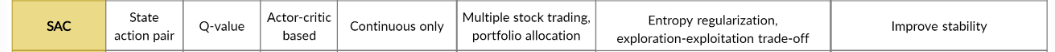

In [38]:
print("==============Model Training===========")
now = datetime.datetime.now().strftime("%Y%m%d-%Hh%M")

model_sac = agent.get_model("sac")
trained_sac = agent.train_model(model=model_sac, tb_log_name="sac", total_timesteps=80000 )

==============Model Training===========
{'batch_size': 64, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cuda device
Logging to tensorboard_log/sac/sac_1
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 51       |
|    time_elapsed    | 98       |
|    total timesteps | 5036     |
| train/             |          |
|    actor_loss      | -171     |
|    critic_loss     | 60.5     |
|    ent_coef        | 0.162    |
|    ent_coef_loss   | 287      |
|    learning_rate   | 0.0001   |
|    n_updates       | 4935     |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 51       |
|    time_elapsed    | 194      |
|    total timesteps | 10072    |
| train/             |          |
|    actor_loss      | 624      |
|    critic_loss     | 592      |
|    ent

#Save Model

In [39]:
!mkdir -p saved_model
trained_sac.save('saved_model/my_modelBIST.h5') 

In [40]:
trained_sac

In [41]:
print("==============Start Trading===========")
e_trade_gym = StockTradingEnv(df=trade, turbulence_threshold=250, **env_kwargs)

df_account_value, df_actions = DRLAgent.DRL_prediction( model=trained_sac, environment = e_trade_gym)


==============Start Trading===========
hit end!


In [42]:
df_account_value

profit_list = []
ac_val = list(df_account_value["account_value"])
print(ac_val)
turn =len(ac_val)
for i in range(turn):
  
  if i != turn-1:

    diff = ac_val[i+1]  - ac_val[i]
    profit_list.append(diff)
  else:
    profit_list.append(float(0))
    
print(profit_list)


[1000000.0, 999718.7109726906, 999490.0263001919, 999363.1170776607, 999069.2476105692, 998479.4470653298, 993606.7653652432, 996110.8936394933, 995898.994688368, 1001096.2913406612, 1002863.1706207038, 999248.8754110575, 997967.2401215076, 996887.3768295287, 997925.6001692055, 1001403.5828170775, 1001505.8288286208, 998770.3993974685, 998670.7954542398, 997799.8695878505, 1000613.6587400197, 1002637.4660508393, 1000512.00543828, 996109.3168645141, 996227.82008121, 994297.4798973559, 993642.3787907123, 996724.4789120674, 999104.2911333323, 995044.3498904706, 997054.8906167268, 1000667.1882930754, 1007174.8766626117, 1006532.518244791, 1002635.3513990641, 1001878.9741214752, 1004269.2640328883, 1007330.4969377517, 994780.67079041, 998866.1441392421, 1000743.1949462413, 1000760.8589200497, 1000555.1780919076, 999033.347021556, 997205.055069876, 1008460.4597849373, 1009332.2902827983, 1008891.5895022636, 1010681.7506355529, 1009912.3652773863, 1011977.4974962955, 1011066.5856888539, 10185

In [43]:
new_df = df_account_value.copy()

new_df["diff"] = np.array(profit_list)

new_df

,date,account_value,diff
0,2020-07-27,1.000000e+06,-281.289027
1,2020-07-28,9.997187e+05,-228.684672
2,2020-07-29,9.994900e+05,-126.909223
3,2020-07-30,9.993631e+05,-293.869467
4,2020-08-04,9.990692e+05,-589.800545
...,...,...,...
244,2021-07-14,1.448861e+06,354.809130
245,2021-07-16,1.449216e+06,-12000.005750
246,2021-07-19,1.437216e+06,-27522.121202
247,2021-07-26,1.409694e+06,34463.067966


In [44]:
%matplotlib inline

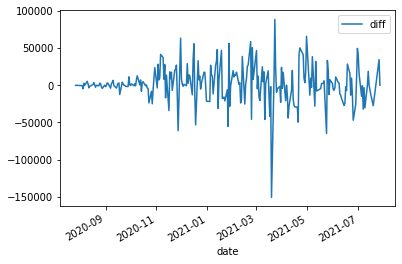

In [45]:
# hesaptaki günlük kar-zarar grafiği
new_df.plot(x='date', y='diff', kind = 'line')

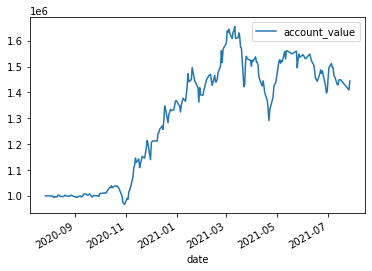

In [46]:
# total hesaptaki maliyetin değişimi
new_df.plot(x='date', y='account_value', kind = 'line')

In [47]:
df_actions

,AKBNK.IS,ARCLK.IS,BIMAS.IS,EREGL.IS,GARAN.IS,HALKB.IS,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,VAKBN.IS,VESTL.IS
date,,,,,,,,,,,,
2020-07-27,0,100,0,0,100,0,100,100,0,0,0,100
2020-07-28,0,100,0,0,100,0,100,100,0,0,0,100
2020-07-29,0,100,0,0,100,0,100,100,0,0,0,100
2020-07-30,0,100,0,0,100,0,100,100,0,0,0,100
2020-08-04,0,100,0,0,100,0,100,100,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-14,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-16,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
ticker_df = df_actions["VESTL.IS"]
ticker_df.sum()


9700

In [49]:
import os
cwd = os.getcwd()
cwd

'/content'

In [50]:
import os
os.chdir('/content/saved_model')


with open("./" + "/df_account_value_BIST" + now + ".csv", 'a') as f1:
    df_account_value.to_csv(f1, header=False)

with open("./"+ "/df_actions_BIST" + now + ".csv", 'a') as f2:
    df_actions.to_csv(f2, header=False)




#Backtesting 

In [51]:
print("==============Get Backtest Results===========")
perf_stats_all = backtest_stats(df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./" +"/perf_stats_all_BIST" + now + ".csv")


==============Get Backtest Results===========
Annual return          0.450566
Cumulative returns     0.444157
Annual volatility      0.278181
Sharpe ratio           1.482576
Calmar ratio           2.043939
Stability              0.778959
Max drawdown          -0.220440
Omega ratio            1.317110
Sortino ratio          2.213143
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.319278
Daily value at risk   -0.033411
dtype: float64


 #Understanding Format of Variables:

In [52]:
train

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,turbulence,x_change
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375.0,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
0,14.750000,14.950000,14.500000,14.600000,11.878804,1976842.0,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
0,23.525000,23.799999,23.325001,23.600000,19.072001,628882.0,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
0,3.990000,4.040000,3.960000,4.040000,1.965522,6776403.0,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
0,7.900000,7.910000,7.740000,7.760000,6.942376,63095366.0,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,0.000000,2.74419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,51.000000,51.900002,50.650002,51.349998,51.349998,2002048.0,PGSUS.IS,2020-07-24,-1.015999,46.712444,-87.886699,2.554014,6.83559
1258,9.150000,9.150000,9.050000,9.100000,8.755303,5455417.0,SAHOL.IS,2020-07-24,0.065249,52.595700,-79.706951,2.554014,6.83559
1258,10.004468,10.263843,9.930361,10.123040,10.123040,29892348.0,SASA.IS,2020-07-24,0.633239,68.646562,138.956885,2.554014,6.83559
1258,4.890000,4.920000,4.840000,4.880000,4.880000,39839221.0,VAKBN.IS,2020-07-24,-0.010792,48.479858,-67.830976,2.554014,6.83559


In [53]:
trade

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,turbulence,x_change
0,5.800000,5.810000,5.700000,5.720000,5.578002,43319180.0,AKBNK.IS,2020-07-27,-0.032535,45.321645,-107.064136,6.141735,6.8407
0,22.240000,22.540001,22.100000,22.160000,20.744827,10243494.0,ARCLK.IS,2020-07-27,1.084334,71.838800,145.124012,6.141735,6.8407
0,74.699997,75.900002,74.250000,74.300003,69.351898,2675233.0,BIMAS.IS,2020-07-27,1.951131,65.861834,192.733720,6.141735,6.8407
0,8.410000,8.510000,8.390000,8.470000,7.452500,36658368.0,EREGL.IS,2020-07-27,0.000343,50.769015,-40.977438,6.141735,6.8407
0,7.950000,7.960000,7.770000,7.800000,7.635209,98366875.0,GARAN.IS,2020-07-27,-0.083367,43.797485,-114.132586,6.141735,6.8407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,67.699997,71.949997,67.199997,71.400002,71.400002,3505926.0,PGSUS.IS,2021-07-27,-2.136392,44.699076,-115.962311,7.048507,8.5545
248,9.070000,9.300000,9.020000,9.290000,9.290000,17634418.0,SAHOL.IS,2021-07-27,0.000826,53.078843,5.758155,7.048507,8.5545
248,29.680000,30.299999,29.340000,29.540001,29.540001,15605997.0,SASA.IS,2021-07-27,-0.567082,47.213518,-26.532921,7.048507,8.5545
248,3.430000,3.440000,3.390000,3.420000,3.420000,30871452.0,VAKBN.IS,2021-07-27,-0.036190,42.210935,-143.798826,7.048507,8.5545


In [54]:
e_train_gym

In [55]:
agent

In [56]:
model_sac

In [57]:
trained_sac

In [58]:
e_trade_gym

In [59]:
df_account_value

,date,account_value
0,2020-07-27,1.000000e+06
1,2020-07-28,9.997187e+05
2,2020-07-29,9.994900e+05
3,2020-07-30,9.993631e+05
4,2020-08-04,9.990692e+05
...,...,...
244,2021-07-14,1.448861e+06
245,2021-07-16,1.449216e+06
246,2021-07-19,1.437216e+06
247,2021-07-26,1.409694e+06


In [60]:
df_actions

,AKBNK.IS,ARCLK.IS,BIMAS.IS,EREGL.IS,GARAN.IS,HALKB.IS,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,VAKBN.IS,VESTL.IS
date,,,,,,,,,,,,
2020-07-27,0,100,0,0,100,0,100,100,0,0,0,100
2020-07-28,0,100,0,0,100,0,100,100,0,0,0,100
2020-07-29,0,100,0,0,100,0,100,100,0,0,0,100
2020-07-30,0,100,0,0,100,0,100,100,0,0,0,100
2020-08-04,0,100,0,0,100,0,100,100,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-14,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-16,0,0,0,0,0,0,0,0,0,0,0,0
